In [1]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

In [3]:
# read in G12 + G15 reals and rands
g12reals = Table.read('/suphys/fscu5535/HSC_work/raw_data/G12+1degzlt0.3.fits')
g12reals.info()

g15reals = Table.read('/suphys/fscu5535/HSC_work/raw_data/G15+1degzlt0.3.fits')
g15reals.info()

g09reals = Table.read('/suphys/fscu5535/HSC_work/raw_data/G09+1degzlt0.3.fits')
g09reals.info()

<Table length=725848>
            name             dtype     class     n_bad 
--------------------------- ------- ------------ ------
                  object_id   int64       Column      0
           object_id_isnull    bool       Column      0
                         ra float64       Column      0
                  ra_isnull    bool       Column      0
                        dec float64       Column      0
                 dec_isnull    bool       Column      0
              photoz_median float32       Column      0
       photoz_median_isnull    bool       Column      0
              i_psfflux_mag float32 MaskedColumn   5766
       i_psfflux_mag_isnull    bool       Column      0
              r_psfflux_mag float32 MaskedColumn  10239
       r_psfflux_mag_isnull    bool       Column      0
             r_kronflux_mag float32 MaskedColumn  17506
      r_kronflux_mag_isnull    bool       Column      0
             i_kronflux_mag float32 MaskedColumn  15761
      i_kronflux_mag_isnul

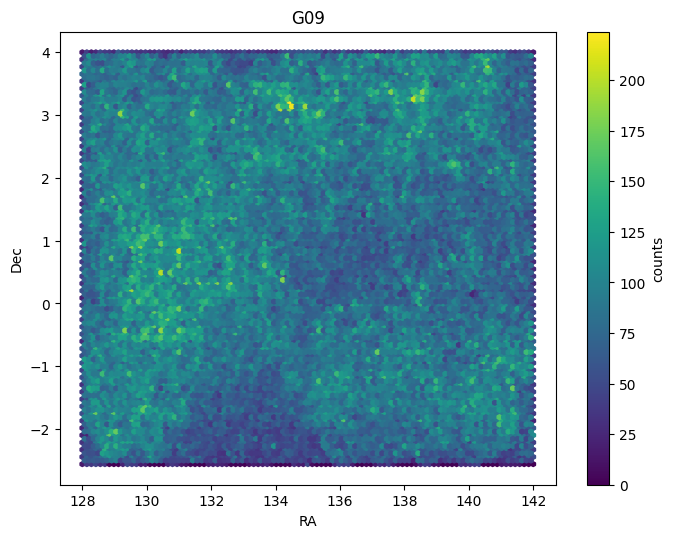

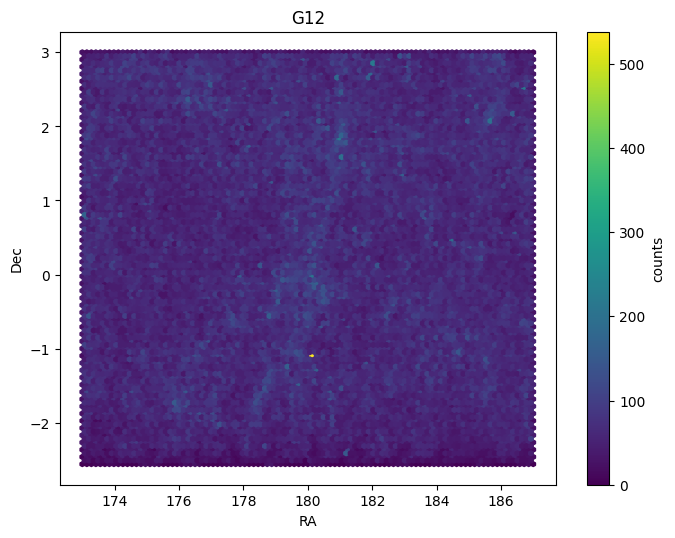

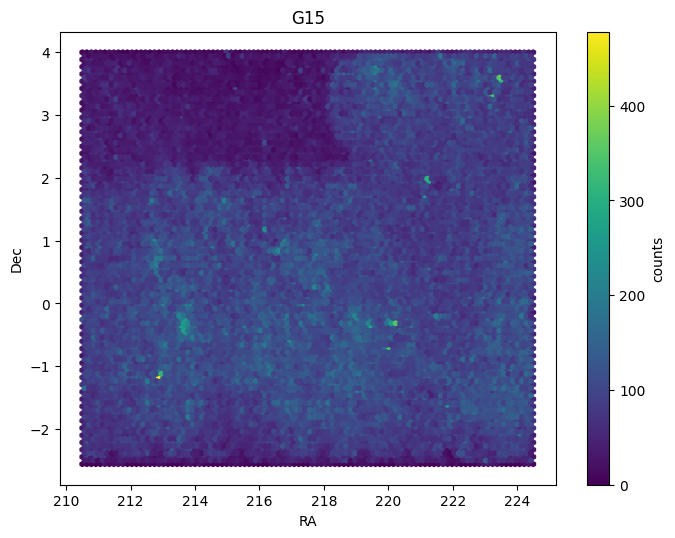

In [5]:
# look at ra/dec of each field 

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g09reals['ra'],g09reals['dec'])
plt.title("G09")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label('counts')

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g12reals['ra'],g12reals['dec'])
plt.title("G12")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label('counts')

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g15reals['ra'],g15reals['dec'])
plt.title("G15")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label('counts')



In [6]:
# classify objects as either star (3+ 0's), galaxy (3+ 1's) or unknown (rest)

# G12

object_id = []
object_type = []

for j in range(len(g12reals)):
    
    star_count = 0
    gal_count = 0
    
    object_id.append(g12reals['object_id'][j])
    
    for filt in ['r_extendedness_value','i_extendedness_value','z_extendedness_value',
                 'y_extendedness_value','g_extendedness_value']:
        if g12reals[filt][j] == 1:
            gal_count += 1
        if g12reals[filt][j] == 0:
            star_count += 1
    
    if star_count >= 3:
        object_type.append('s')
    elif gal_count >= 3:
        object_type.append('g')
    else:
        object_type.append('u')
        
# convert to table format and then left join to g12reals table
data_to_add = Table()
data_to_add['object_id'] = object_id
data_to_add['object_type'] = object_type

g12reals = join(g12reals,data_to_add,keys='object_id',join_type='left')

#######################
# G15

# classify objects as either star (3+ 0's), galaxy (3+ 1's) or unknown (rest)

object_id = []
object_type = []

for j in range(len(g15reals)):
    
    star_count = 0
    gal_count = 0
    
    object_id.append(g15reals['object_id'][j])
    
    for filt in ['r_extendedness_value','i_extendedness_value','z_extendedness_value',
                 'y_extendedness_value','g_extendedness_value']:
        if g15reals[filt][j] == 1:
            gal_count += 1
        if g15reals[filt][j] == 0:
            star_count += 1
    
    if star_count >= 3:
        object_type.append('s')
    elif gal_count >= 3:
        object_type.append('g')
    else:
        object_type.append('u')
        
# convert to table format and then left join to g15reals table
data_to_add = Table()
data_to_add['object_id'] = object_id
data_to_add['object_type'] = object_type

g15reals = join(g15reals,data_to_add,keys='object_id',join_type='left')




In [8]:
g12reals.write('/suphys/fscu5535/HSC_work/raw_data/G12+1degzlt0.3.fits',overwrite=True)
g15reals.write('/suphys/fscu5535/HSC_work/raw_data/G15+1degzlt0.3.fits',overwrite=True)

In [9]:
# plot extendedness values hist for each object type
# G12
star_ids = []
gal_ids = []
unk_ids = []

for i in range(len(g12reals)):
    
    if g12reals['object_type'][i] == 's':
        star_ids.append(g12reals['object_id'][i])  
        
    if g12reals['object_type'][i] == 'g':
        gal_ids.append(g12reals['object_id'][i])  
        
    if g12reals['object_type'][i] == 'u':
        unk_ids.append(g12reals['object_id'][i])
        
star_table = Table()
star_table['object_id'] = star_ids
star_table = join(star_table,g12reals,keys='object_id',join_type='left')
star_table.write('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_stars.fits')

print("stars done")

gal_table = Table()
gal_table['object_id'] = gal_ids
gal_table = join(gal_table,g12reals,keys='object_id',join_type='left')
gal_table.write('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')

print("galaxies done")

unk_table = Table()
unk_table['object_id'] = unk_ids
unk_table = join(unk_table,g12reals,keys='object_id',join_type='left')
unk_table.write('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_unknowns.fits')

print("unknowns done")

############
# G15

print("starting g15")

# plot extendedness values hist for each object type

star_ids = []
gal_ids = []
unk_ids = []

for i in range(len(g15reals)):
    
    if g15reals['object_type'][i] == 's':
        star_ids.append(g15reals['object_id'][i])  
        
    if g15reals['object_type'][i] == 'g':
        gal_ids.append(g15reals['object_id'][i])  
        
    if g15reals['object_type'][i] == 'u':
        unk_ids.append(g15reals['object_id'][i])
        
star_table = Table()
star_table['object_id'] = star_ids
star_table = join(star_table,g15reals,keys='object_id',join_type='left')
star_table.write('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_stars.fits')

print("stars done")

gal_table = Table()
gal_table['object_id'] = gal_ids
gal_table = join(gal_table,g15reals,keys='object_id',join_type='left')
gal_table.write('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')

print("galaxies done")

unk_table = Table()
unk_table['object_id'] = unk_ids
unk_table = join(unk_table,g15reals,keys='object_id',join_type='left')
unk_table.write('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_unknowns.fits')

print("unknowns done")

stars done
galaxies done
unknowns done
starting g15
stars done
galaxies done
unknowns done


In [10]:
g12stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_stars.fits')
g12stars.info()
g12gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
g12gals.info()
g12unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_unknowns.fits')
g12unks.info()

g15stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_stars.fits')
g15stars.info()
g15gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')
g15gals.info()
g15unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_unknowns.fits')
g15unks.info()


<Table length=142961>
            name             dtype     class     n_bad
--------------------------- ------- ------------ -----
                  object_id   int64 MaskedColumn     0
           object_id_isnull    bool       Column     0
                         ra float64       Column     0
                  ra_isnull    bool       Column     0
                        dec float64       Column     0
                 dec_isnull    bool       Column     0
              photoz_median float32       Column     0
       photoz_median_isnull    bool       Column     0
              i_psfflux_mag float32 MaskedColumn   815
       i_psfflux_mag_isnull    bool       Column     0
              r_psfflux_mag float32 MaskedColumn  1647
       r_psfflux_mag_isnull    bool       Column     0
             r_kronflux_mag float32 MaskedColumn  1684
      r_kronflux_mag_isnull    bool       Column     0
             i_kronflux_mag float32 MaskedColumn  1204
      i_kronflux_mag_isnull    bool       C

In [13]:
for i in range(len(g12stars)):
    if g12stars['object_type'][i] != 's':
        print("uhoh! s")
        
for i in range(len(g12gals)):
    if g12gals['object_type'][i] != 'g':
        print("uhoh! g")

for i in range(len(g12unks)):
    if g12unks['object_type'][i] != 'u':
        print("uhoh! u")
        
for i in range(len(g15stars)):
    if g15stars['object_type'][i] != 's':
        print("uhoh! s")
        
for i in range(len(g15gals)):
    if g15gals['object_type'][i] != 'g':
        print("uhoh! g")

for i in range(len(g15unks)):
    if g15unks['object_type'][i] != 'u':
        print("uhoh! u")

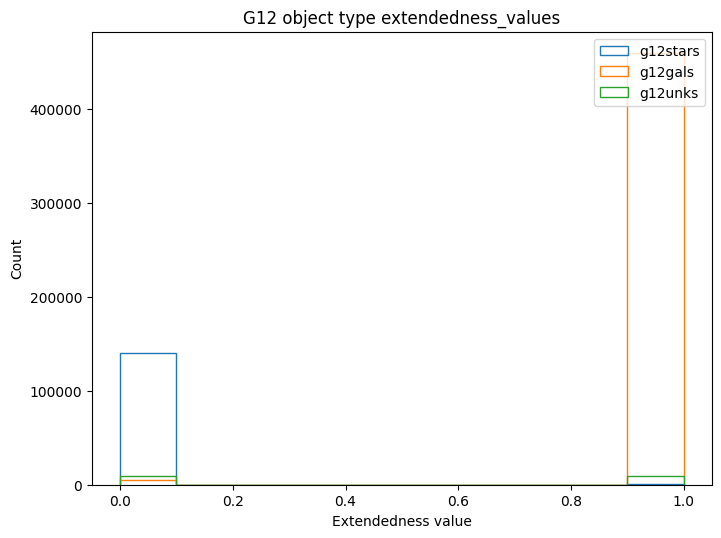

In [20]:
# plot extendedness values
plt.figure(figsize=(8,6),dpi=100)
plt.hist(g12stars['g_extendedness_value'],label='g12stars',histtype='step', fill=False)
plt.hist(g12gals['g_extendedness_value'],label='g12gals',histtype='step', fill=False)
plt.hist(g12unks['g_extendedness_value'],label='g12unks',histtype='step', fill=False)
plt.title("G12 object type extendedness_values")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

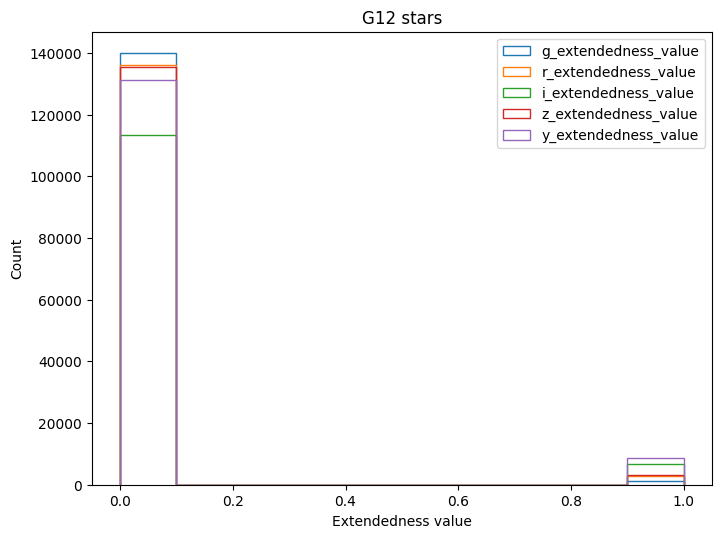

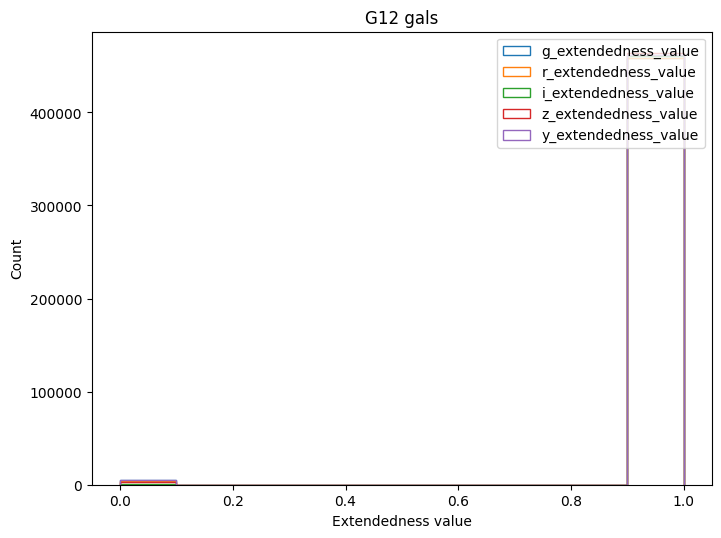

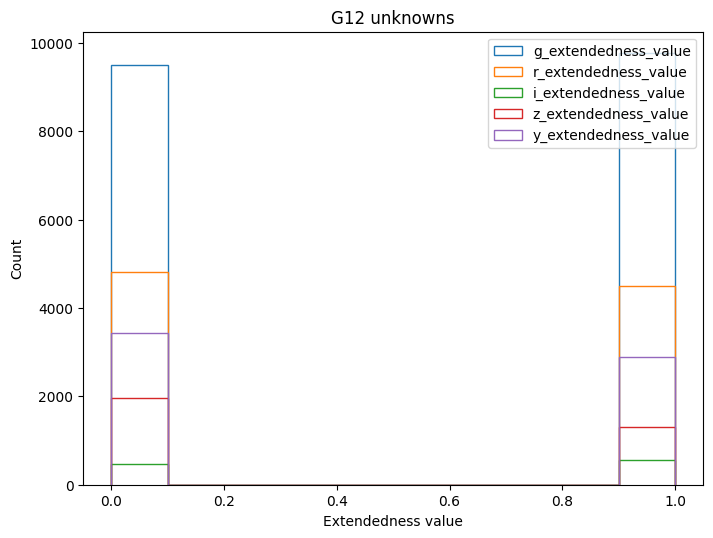

In [60]:
# plot extendedness values
plt.figure(figsize=(8,6),dpi=100)

for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g12stars[filt],label=filt,histtype='step', fill=False)

plt.title("G12 stars")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/G12stars.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)


plt.figure(figsize=(8,6),dpi=100)
for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g12gals[filt],label=filt,histtype='step', fill=False)

plt.title("G12 gals")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

    
filename = "/suphys/fscu5535/HSC_work/figures/G12gals.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

plt.figure(figsize=(8,6),dpi=100)

for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g12unks[filt],label=filt,histtype='step', fill=False)

plt.title("G12 unknowns")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

    
filename = "/suphys/fscu5535/HSC_work/figures/G12unks.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

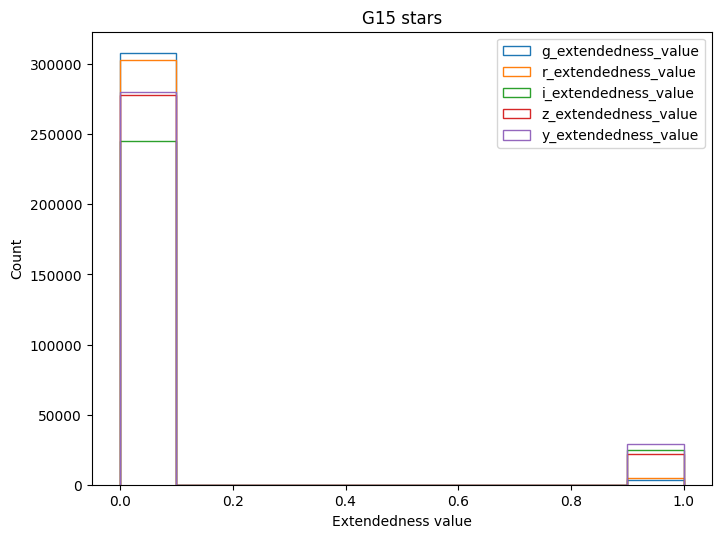

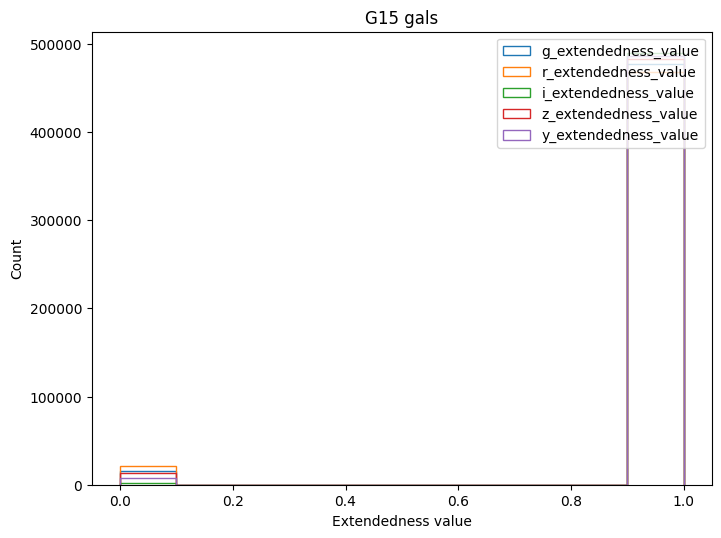

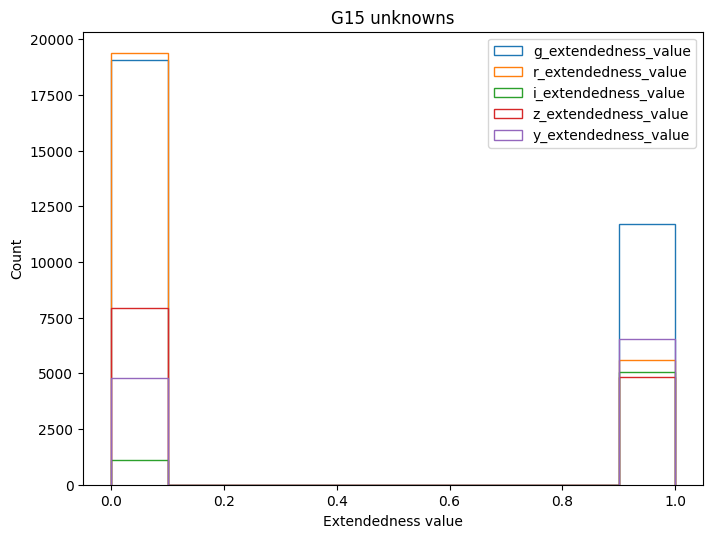

In [61]:
# plot extendedness values
# G15!!
plt.figure(figsize=(8,6),dpi=100)

for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g15stars[filt],label=filt,histtype='step', fill=False)

plt.title("G15 stars")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

    
filename = "/suphys/fscu5535/HSC_work/figures/G15stars.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

plt.figure(figsize=(8,6),dpi=100)
for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g15gals[filt],label=filt,histtype='step', fill=False)

plt.title("G15 gals")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

    
filename = "/suphys/fscu5535/HSC_work/figures/G15gals.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

plt.figure(figsize=(8,6),dpi=100)

for filt in ['g_extendedness_value','r_extendedness_value','i_extendedness_value',
             'z_extendedness_value','y_extendedness_value']:
    plt.hist(g15unks[filt],label=filt,histtype='step', fill=False)

plt.title("G15 unknowns")
plt.xlabel("Extendedness value")
plt.ylabel("Count")
plt.legend()

    
filename = "/suphys/fscu5535/HSC_work/figures/G15unks.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

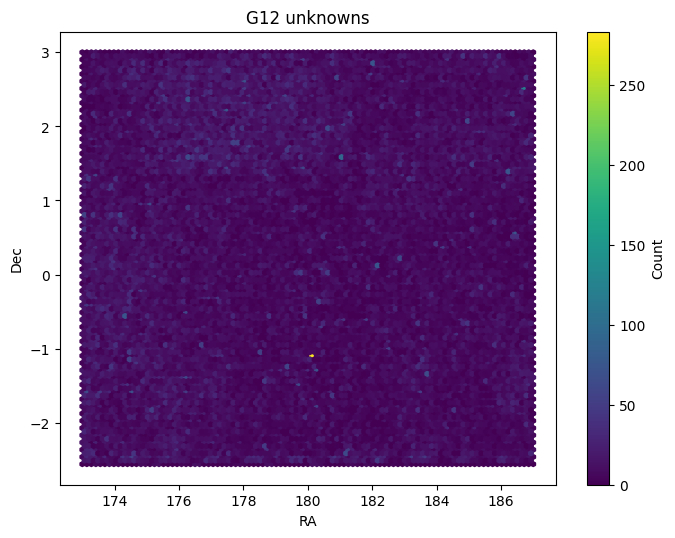

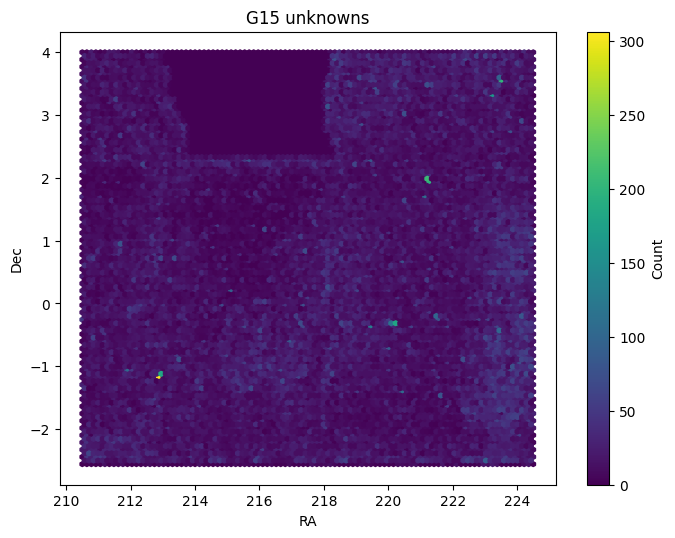

In [62]:
# so classification looks good. now look at unknown dists

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g12unks['ra'],g12unks['dec'])
plt.title("G12 unknowns")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label('Count')
    
filename = "/suphys/fscu5535/HSC_work/figures/G12unksradecdist.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g15unks['ra'],g15unks['dec'])
plt.title("G15 unknowns")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label('Count')

filename = "/suphys/fscu5535/HSC_work/figures/G15unksradecdist.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

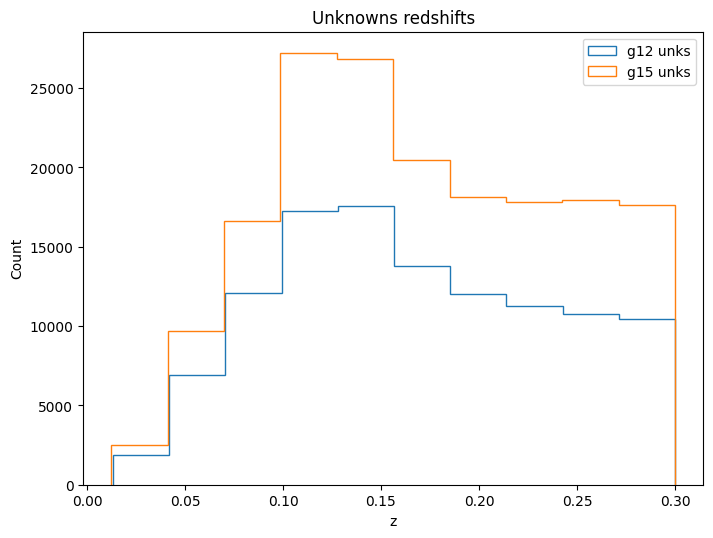

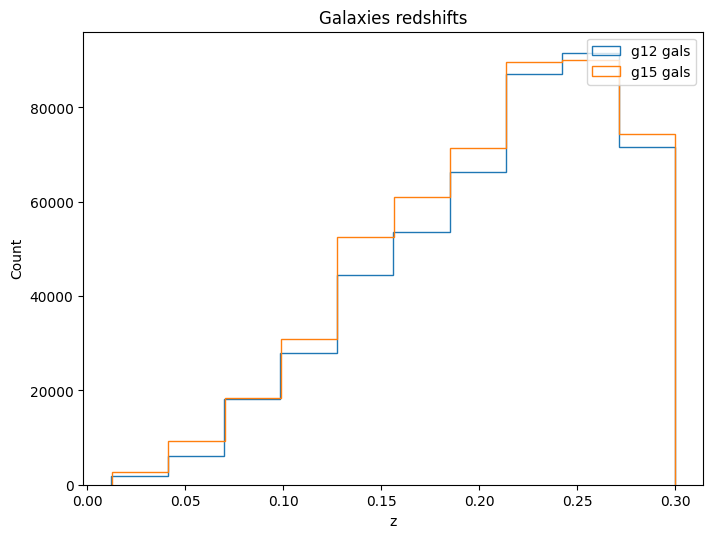

In [66]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(g12unks['photoz_median'],fill=False,histtype="step",label="g12 unks")
plt.hist(g15unks['photoz_median'],fill=False,histtype="step",label="g15 unks")
plt.title("Unknowns redshifts")
plt.xlabel("z")
plt.ylabel("Count")
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/g12g15unkszdist.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

plt.figure(figsize=(8,6),dpi=100)
plt.hist(g12gals['photoz_median'],fill=False,histtype="step",label="g12 gals")
plt.hist(g15gals['photoz_median'],fill=False,histtype="step",label="g15 gals")
plt.title("Galaxies redshifts")
plt.xlabel("z")
plt.ylabel("Count")
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/g12g15galszdist.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)


In [25]:
# now look at randoms dist
g12rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g12randisprim.fits')
g15rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g15randisprim.fits')

Text(0, 0.5, 'Dec')

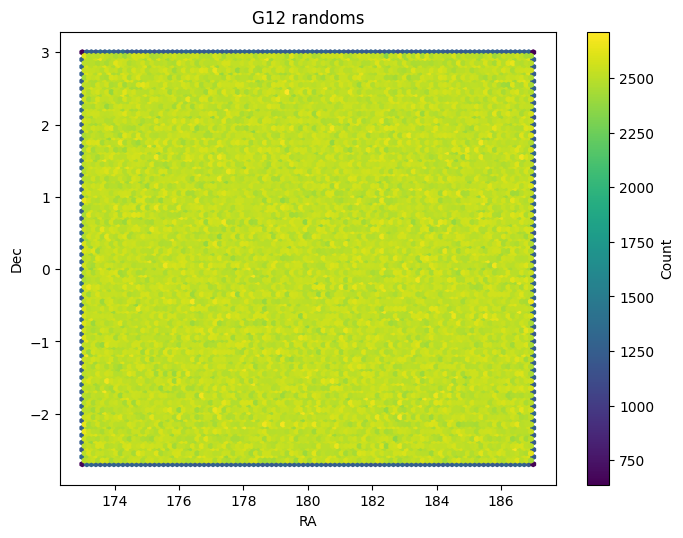

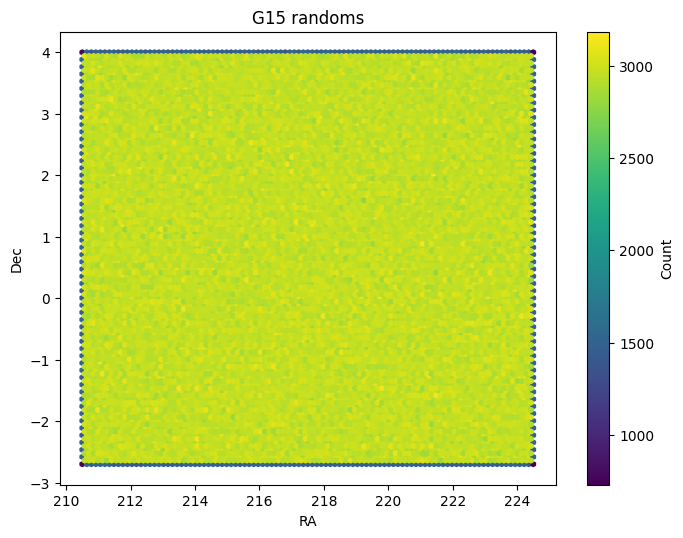

In [26]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g12rands['ra'],g12rands['dec'])
plt.title("G12 randoms")
plt.xlabel("RA")
plt.ylabel("Dec")
cb = plt.colorbar()
cb.set_label("Count")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g15rands['ra'],g15rands['dec'])
plt.title("G15 randoms")
cb = plt.colorbar()
cb.set_label("Count")
plt.xlabel("RA")
plt.ylabel("Dec")


In [28]:
# now identify all sami galaxies in the g12 and g15 fields

SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
SAMI_G09_gals.info()

<Table length=676>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn    18
        ELLIP float64           MaskedColumn    18
   LAMBDAR_RE float64           MaskedColumn   286
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0


In [36]:
# now extract all SAMI galaxies in G15 field

sami = Table.read('/suphys/fscu5535/python_scripts/raw_data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20220604_private.fits')

CATID = []
repeats = []
RA = []
DEC = []
Z = []
RE = []
ELLIP = []
LAMBDAR_RE = []


G15_min_RA = 210.5
G15_max_RA = 224.5

for i in range(len(sami)):
    if G15_min_RA <= sami['RA'][i] <= G15_max_RA:
 

        # don't store repeated CATID's twice
        if sami['CATID'][i] in CATID:
            repeats.append(sami['CATID'][i])
        else:            
            CATID.append(sami['CATID'][i])
            RA.append(sami['RA'][i])
            DEC.append(sami['DEC'][i])
            Z.append(sami['Z_SPEC'][i])
            RE.append(sami['RE_CIRC_KPC'][i])
            ELLIP.append(sami['ELLIP'][i])
            LAMBDAR_RE.append(sami['LAMBDAR_RE'][i])
            

print("total:",len(CATID)+len(repeats))
print("unique:",len(CATID))
print()

#check that repeated CATID's have the same values for each entry
# print("repeated ids")
# for j in repeats:
#     for k in range(len(sami)):
#         if j == sami['CATID'][k]:
#             print(sami['RA'][k])
#             print(sami['DEC'][k])
#             print(sami['Z_SPEC'][k])
#             print(sami['RE_CIRC_KPC'][k])
#             print()
#     print()
#     print()
    
#now store the results and save
G15_sami = Table()
G15_sami['CATID'] = CATID
G15_sami['RA'] = RA
G15_sami['DEC'] = DEC
G15_sami['Z_SPEC'] = Z
G15_sami['RE_CIRC_KPC'] = RE
G15_sami['ELLIP'] = ELLIP
G15_sami['LAMBDAR_RE'] = LAMBDAR_RE

G15_sami.write('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')

total: 924
unique: 745



In [37]:
# calculating ra/dec in rad and ang diam dist for sami

sami = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')
sami.info()

ang_diam_dist = np.zeros(len(sami))

for i in range(len(sami)):
    ang_diam_dist[i] = cosmo.angular_diameter_distance(sami['Z_SPEC'][i]).value
        
sami['RA'] = sami['RA']*u.deg
sami['DEC'] = sami['DEC']*u.deg   
sami['RA_RAD'] = sami['RA']*(np.pi/180)*u.rad/u.deg
sami['DEC_RAD'] = sami['DEC']*(np.pi/180)*u.rad/u.deg

print(sami['RA'][0:5])
print(sami['RA_RAD'][0:5])

sami['ANG_DIAM_DIST'] = ang_diam_dist*u.Mpc*1/u.rad
print(sami['ANG_DIAM_DIST'][0:5])
sami.info()

<Table length=745>
    name     dtype     class     n_bad
----------- ------- ------------ -----
      CATID   int64 MaskedColumn     0
         RA float32       Column     0
        DEC float32       Column     0
     Z_SPEC float32       Column     0
RE_CIRC_KPC float64 MaskedColumn     3
      ELLIP float64 MaskedColumn     3
 LAMBDAR_RE float64 MaskedColumn   340
    RA   
   deg   
---------
212.02463
212.11497
  212.628
212.91035
212.93002
  RA_RAD 
   rad   
---------
 3.700528
3.7021046
3.7110589
3.7159867
  3.71633
  ANG_DIAM_DIST   
    Mpc / rad     
------------------
303.02310867992395
107.31215117973888
407.58632081092384
465.51550503417974
103.89374644726665
<Table length=745>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column

In [38]:
print(sami['Z_SPEC'][0:5])

 Z_SPEC
-------
0.07673
0.02559
0.10682
0.12445
0.02475


In [39]:
sami.write('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits',overwrite=True)
sami.info()

<Table length=745>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn     3
        ELLIP float64           MaskedColumn     3
   LAMBDAR_RE float64           MaskedColumn   340
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0


In [40]:
samig09 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
samig09.info()

samig12 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_sami_1.0.fits')
samig12.info()

samig15 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')
samig15.info()

<Table length=676>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn    18
        ELLIP float64           MaskedColumn    18
   LAMBDAR_RE float64           MaskedColumn   286
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0
<Table length=732>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn

In [43]:
print(len(samig15['CATID']))
print(len(set(samig15['CATID'])))

745
745


In [46]:
# now fix up random data: convert from deg to rad
g09rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_rand_1.0.fits')
g09rands.info()

g12rands.info()
g15rands.info()


<Table length=33758718>
   name    dtype 
--------- -------
object_id   int64
       ra float64
      dec float64
   ra_rad float64
  dec_rad float64
<Table length=28721017>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool
<Table length=33759857>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool


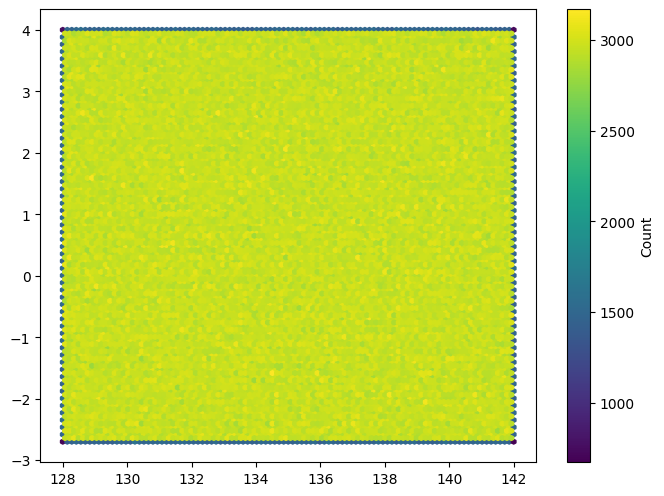

In [47]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g09rands['ra'],g09rands['dec'])
cb = plt.colorbar()
cb.set_label('Count')

In [51]:
# g12rands.remove_columns(['object_id_isnull','ra_isnull','dec_isnull'])
# g15rands.remove_columns(['object_id_isnull','ra_isnull','dec_isnull'])

g12rands['ra_rad'] = g12rands['ra']*(np.pi/180)
g12rands['dec_rad'] = g12rands['dec']*(np.pi/180)

g15rands['ra_rad'] = g15rands['ra']*(np.pi/180)
g15rands['dec_rad'] = g15rands['dec']*(np.pi/180)

print(g12rands['ra'][0:5])
print(g12rands['ra_rad'][0:5])
print(g12rands['dec'][0:5])
print(g12rands['dec_rad'][0:5])

print(g15rands['ra'][0:5])
print(g15rands['ra_rad'][0:5])
print(g15rands['dec'][0:5])
print(g15rands['dec_rad'][0:5])


        ra        
------------------
173.13778623015565
173.25600578342025
173.26887196790483
173.25446967939328
173.26515552352905
      ra_rad      
------------------
 3.021824429330317
 3.023887749775021
3.0241123070564457
3.0238609397020975
3.0240474428656214
        dec        
-------------------
-2.5240923973666294
 -2.685199580015262
-2.6649932761325372
 -2.523106004007273
-2.6772950796516386
       dec_rad       
---------------------
-0.044053722958604734
 -0.04686557374443525
 -0.04651290721202319
 -0.04403650714676416
 -0.04672761418736494
        ra        
------------------
 211.9722880144094
 211.9315276540188
211.93146640695548
211.93114477507442
 211.9412134948717
      ra_rad      
------------------
3.6996143488371573
3.6989029463440417
3.6989018773811297
 3.698896263845826
 3.699071996157749
        dec        
-------------------
-2.5640408074473955
 -2.585976424997689
 -2.645823828809712
 -2.653537695281232
-2.5622345067228895
       dec_rad       
------------

In [52]:
g12rands.write('/suphys/fscu5535/HSC_work/mod_data/g12randisprim.fits',overwrite=True)
g15rands.write('/suphys/fscu5535/HSC_work/mod_data/g15randisprim.fits',overwrite=True)


In [55]:
g12gals.info()
g12gals['ra_rad'] = g12gals['ra']*(np.pi/180)
g12gals['dec_rad'] = g12gals['dec']*(np.pi/180)

g15gals.info()
g15gals['ra_rad'] = g15gals['ra']*(np.pi/180)
g15gals['dec_rad'] = g15gals['dec']*(np.pi/180)


print(g12gals[0:3])
print()
print()
print(g15gals[0:3])



<Table length=468851>
            name             dtype     class     n_bad
--------------------------- ------- ------------ -----
                  object_id   int64 MaskedColumn     0
           object_id_isnull    bool       Column     0
                         ra float64       Column     0
                  ra_isnull    bool       Column     0
                        dec float64       Column     0
                 dec_isnull    bool       Column     0
              photoz_median float32       Column     0
       photoz_median_isnull    bool       Column     0
              i_psfflux_mag float32 MaskedColumn   894
       i_psfflux_mag_isnull    bool       Column     0
              r_psfflux_mag float32 MaskedColumn  4473
       r_psfflux_mag_isnull    bool       Column     0
             r_kronflux_mag float32 MaskedColumn  3584
      r_kronflux_mag_isnull    bool       Column     0
             i_kronflux_mag float32 MaskedColumn  2187
      i_kronflux_mag_isnull    bool       C

In [57]:
print(g15gals['ra'][0:3])
print(g15gals['dec'][0:3])

        ra        
------------------
211.90347027217356
211.97097061357735
211.97090067812726
        dec        
-------------------
 -2.418264239207354
-2.4121630557090303
 -2.404269941506047


In [58]:
g12gals.write('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits',overwrite=True)
g15gals.write('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits',overwrite=True)


Text(0.5, 1.0, 'g15 sami')

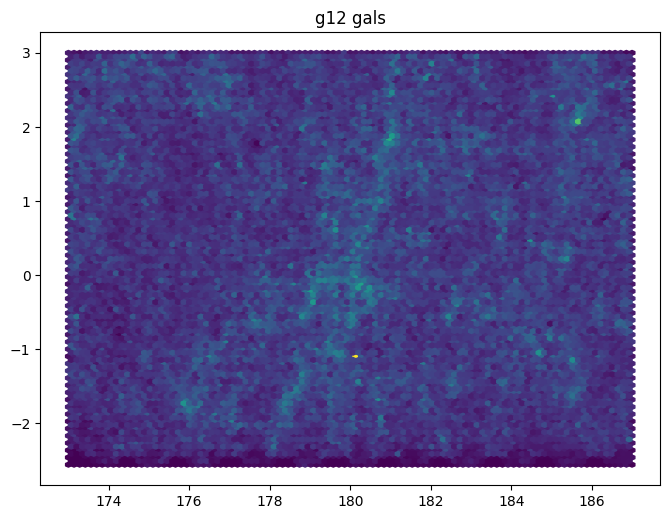

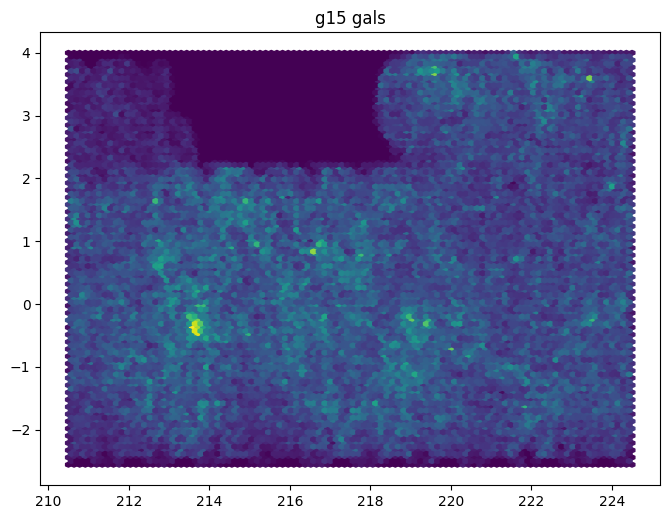

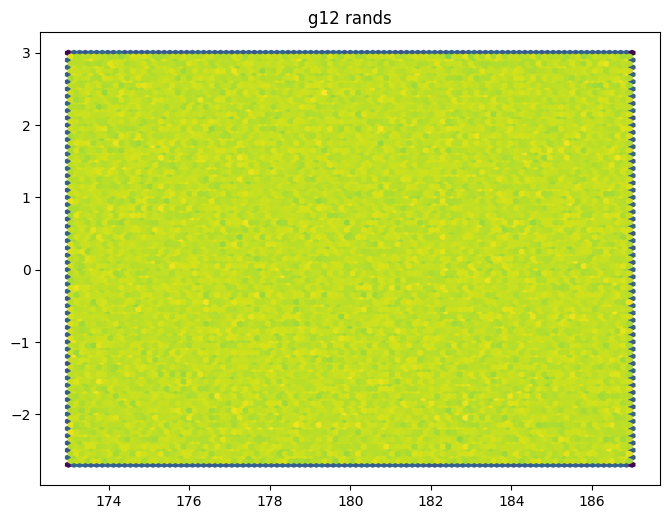

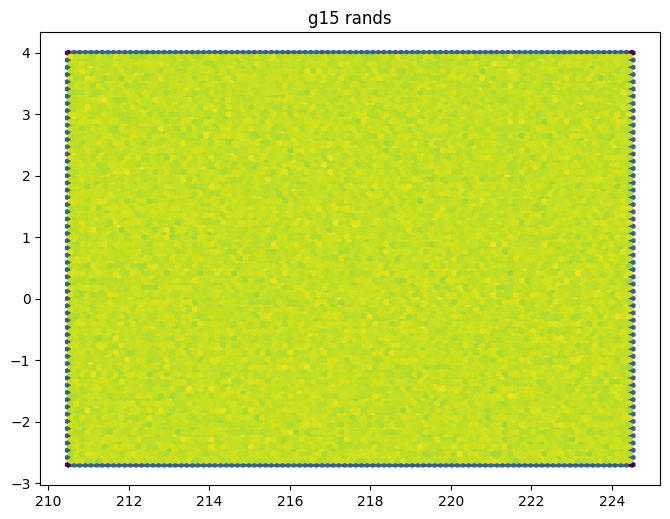

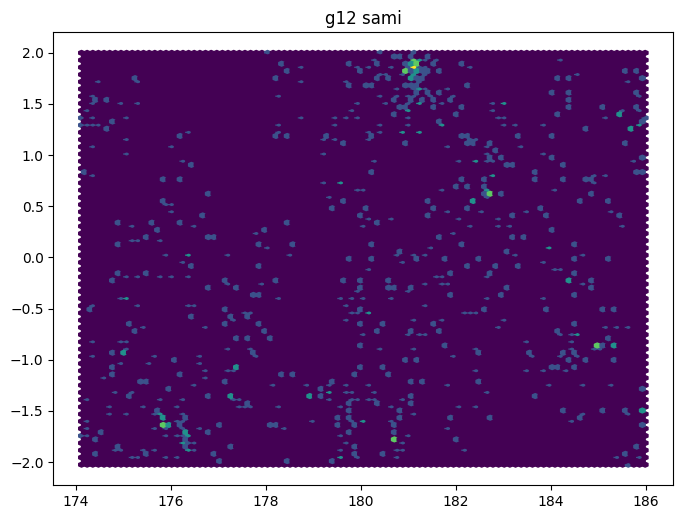

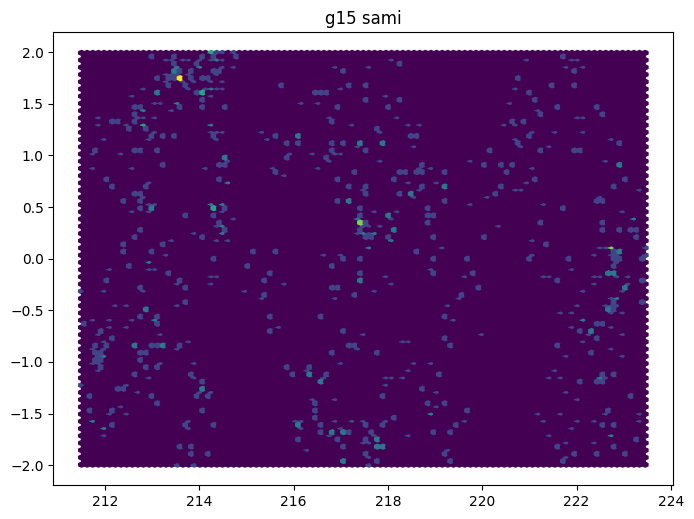

In [59]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g12gals['ra'],g12gals['dec'])
plt.title("g12 gals")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g15gals['ra'],g15gals['dec'])
plt.title("g15 gals")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g12rands['ra'],g12rands['dec'])
plt.title("g12 rands")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(g15rands['ra'],g15rands['dec'])
plt.title("g15 rands")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(samig12['RA'],samig12['DEC'])
plt.title("g12 sami")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(samig15['RA'],samig15['DEC'])
plt.title("g15 sami")

